## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_HPG_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,23572.517415,23724.271819,23471.347812,23521.932614,NaN,NaN,13150100
2021-03-16,23572.517415,23572.517415,23167.839004,23319.593408,NaN,NaN,17717302
2021-03-17,23344.885809,23496.640213,23294.301008,23420.763011,NaN,NaN,13091800
2021-03-18,23623.102216,23648.394617,23446.055412,23572.517415,NaN,NaN,13501500
2021-03-19,23572.517415,24002.488226,23572.517415,23850.733822,NaN,NaN,19901100


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_HPG_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,4.364909e+12,2.806801e+12,14.093654,438.819779,-0.1417,0.1105,0.9581,2.043746,0.158261,17878.384826
Q3/2024,4.731177e+12,3.022947e+12,14.920453,472.612318,0.3708,0.1151,0.8911,2.122198,0.162472,17446.146994
Q2/2024,5.247480e+12,3.319263e+12,19.412489,518.938915,1.0667,0.1080,0.9011,2.109709,0.193639,16974.630099
Q1/2024,4.153983e+12,2.870589e+12,24.118159,448.792434,5.5652,0.0919,0.9119,2.096650,0.158330,16497.238964
Q4/2023,4.471610e+12,2.972779e+12,82.369601,511.244870,2.4927,0.0684,0.8260,2.210607,0.190339,17674.021829


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,26562.500000,2024-12-31
Q3/2024,26200.000000,2024-09-30
Q2/2024,28865.000000,2024-06-30
Q1/2024,27311.363636,2024-03-31
Q4/2023,25000.000000,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,8.183042e+12,6.977554e+12,10.761833,1559.954151,0.8847,0.3131,1.0987,1.910128,0.230518,14765.175491,24292.748634,NaN,NaN
Q2/2021,1.147706e+13,9.721407e+12,11.329997,2173.390234,1.6254,0.3982,1.1600,1.862041,0.235069,16499.371373,34484.628276,10191.879642,0.419544
Q3/2021,1.186090e+13,1.035174e+13,8.724235,2314.312086,1.0325,0.4560,1.0711,1.933657,0.231267,18810.151253,36920.552567,2435.924291,0.070638
Q4/2021,9.587410e+12,7.427443e+12,7.438743,1660.534675,0.1863,0.4603,0.9634,2.038012,0.253405,20260.888511,31674.796978,-5245.755589,-0.142082
Q1/2022,1.010833e+13,8.216960e+12,5.996867,1413.114908,-0.0941,0.4325,0.8780,2.138898,0.242022,16993.446267,31690.277465,15.480487,0.000489


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,8.183042e+12,6.977554e+12,10.761833,1559.954151,0.8847,0.3131,1.0987,1.910128,0.230518,14765.175491,24292.748634,NaN,NaN
Q2/2021,1.147706e+13,9.721407e+12,11.329997,2173.390234,1.6254,0.3982,1.1600,1.862041,0.235069,16499.371373,34484.628276,10191.879642,0.419544
Q3/2021,1.186090e+13,1.035174e+13,8.724235,2314.312086,1.0325,0.4560,1.0711,1.933657,0.231267,18810.151253,36920.552567,2435.924291,0.070638
Q4/2021,9.587410e+12,7.427443e+12,7.438743,1660.534675,0.1863,0.4603,0.9634,2.038012,0.253405,20260.888511,31674.796978,-5245.755589,-0.142082
Q1/2022,1.010833e+13,8.216960e+12,5.996867,1413.114908,-0.0941,0.4325,0.8780,2.138898,0.242022,16993.446267,31690.277465,15.480487,0.000489


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |          gross_profit |            net_income |     pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|----------------------:|----------------------:|-------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                 16.00 |                 16.00 |  16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  |  5,581,701,599,737.44 |  3,863,519,853,232.19 |  20.89 |   763.86 |         0.66 |  0.20 |       0.92 |            2.10 |             0.19 |    17,179.18 |   25,978.13 |         151.32 |         0.02 |
| std   |  3,756,705,734,484.79 |  3,732,740,539,870.49 |  54.67 |   814.76 |         1.74 |  0.17 |       0.12 |            0.14 |             0.04 |  

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                              Variance |
|:---------------|--------------------------------------:|
| gross_profit   | 14,112,837,975,510,886,125,666,304.00 |
| net_income     | 13,933,351,937,992,652,190,908,416.00 |
| pe             |                              2,989.18 |
| eps            |                            663,834.16 |
| eps_growth     |                                  3.01 |
| roe            |                                  0.03 |
| de_ratio       |                                  0.02 |
| current_ratio  |                                  0.02 |
| asset_turnover |                                  0.00 |
| book_value     |                          1,390,262.48 |
| close_avg      |                         32,852,553.86 |
| price_change   |                         22,522,115.87 |
| pct_change     |                                  0.03 |


### Vẽ biểu đồ biến động 

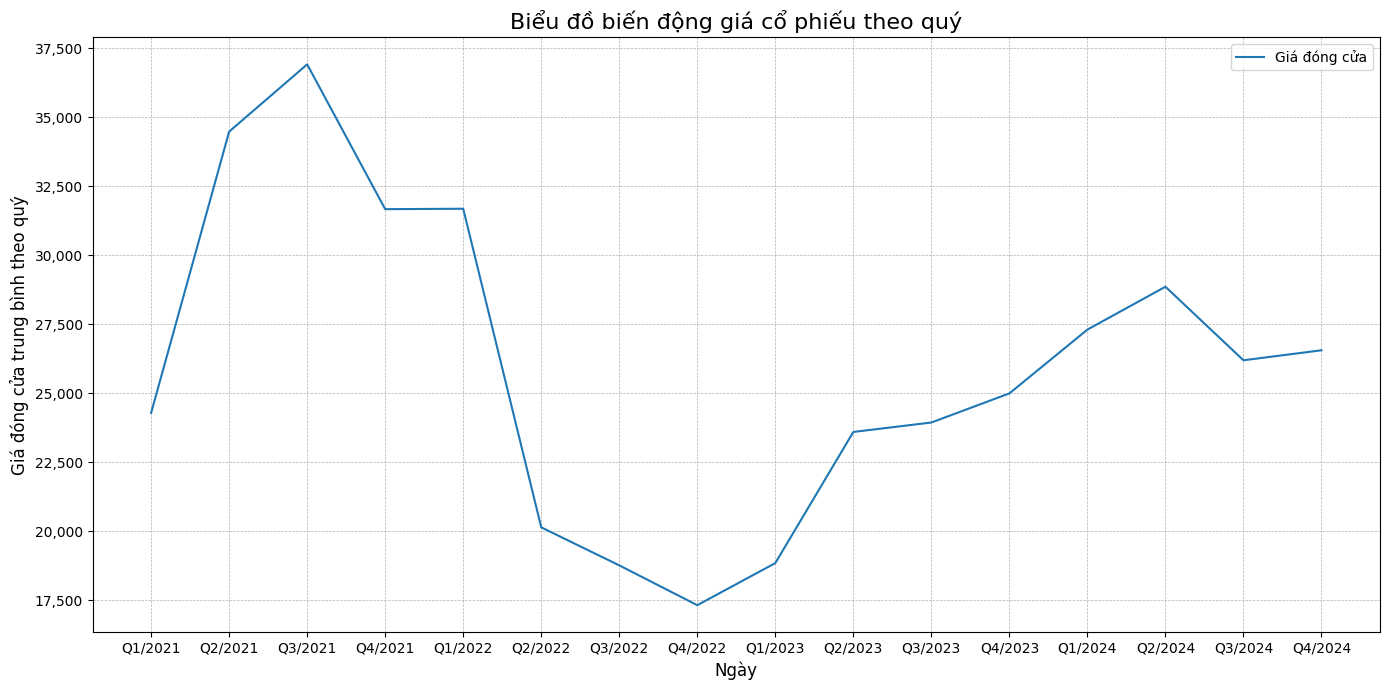

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

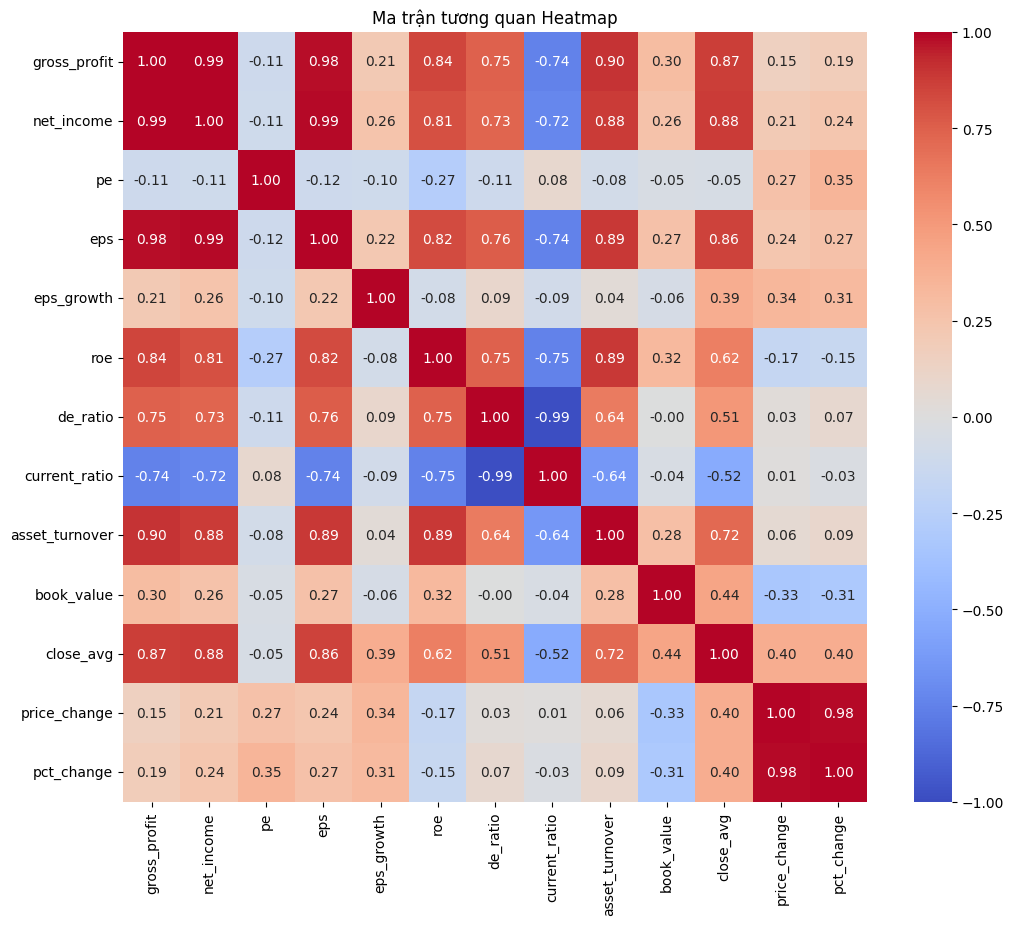

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
net_income        0.879958
gross_profit      0.871165
eps               0.856634
asset_turnover    0.716507
roe               0.619193
de_ratio          0.513682
book_value        0.440236
price_change      0.397796
pct_change        0.395919
eps_growth        0.393792
pe               -0.047229
current_ratio    -0.524078
Name: close_avg, dtype: float64

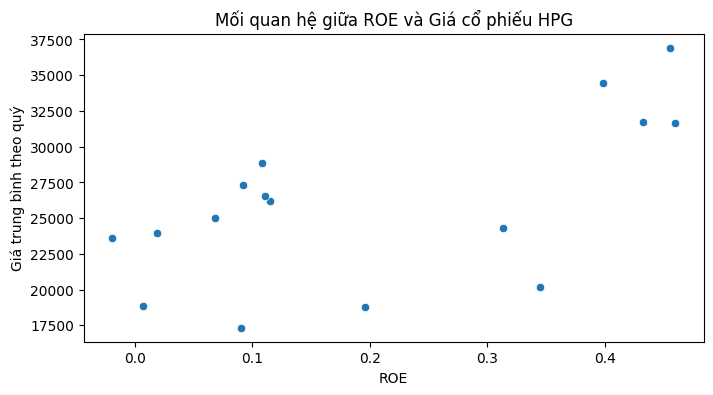

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu HPG')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()